<a href="https://colab.research.google.com/github/ShoaibFarooqui/Emotion-Classification/blob/Shoaib/emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Classification
40 sample demonstration identifying Emotional States using a Recurrent Neural Network

## Reference
 F. Samaria and A. Harter 
  "Parameterisation of a stochastic model for human face identification"
  2nd IEEE Workshop on Applications of Computer Vision
  December 1994, Sarasota (Florida).

In [25]:
import zipfile
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

In [26]:
# compressed file extraction after zip import
zip_path = '/content/data.zip'
extract_path = '/content/extracted_files/'
with zipfile.ZipFile(zip_path, 'r') as zip:
  zip.extractall(extract_path)

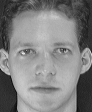

In [27]:
# sample image display
face_sample = Image.open('/content/extracted_files/data/s1/1.pgm')
display(face_sample)

In [28]:
# def function that opens a given sample (s# folder)
def sample_col(sample_directory):
  pgm_images = []
  for pgm_image in os.scandir(sample_directory):
    if pgm_image.name.endswith('.pgm'):
      pgm_images.append(pgm_image.path)
  
  # for image_file in pgm_images:
  #   Image.open(image_file).show()
  
  return pgm_images

In [29]:
# demo sample_col() function
sample_col('/content/extracted_files/data/s6')  

['/content/extracted_files/data/s6/7.pgm',
 '/content/extracted_files/data/s6/8.pgm',
 '/content/extracted_files/data/s6/9.pgm',
 '/content/extracted_files/data/s6/6.pgm',
 '/content/extracted_files/data/s6/5.pgm',
 '/content/extracted_files/data/s6/3.pgm',
 '/content/extracted_files/data/s6/10.pgm',
 '/content/extracted_files/data/s6/1.pgm',
 '/content/extracted_files/data/s6/2.pgm',
 '/content/extracted_files/data/s6/4.pgm']

In [34]:
# collect all images
all_images = {}

s_folder = np.arange(1,41,1)
for i in s_folder:
  s_folder_path = f'/content/extracted_files/data/s{i}'
  sample_image_list = sample_col(s_folder_path)
  all_images[f"s{i}"] = sample_image_list


In [35]:
# combine all images for test data split
all_images_unlisted = []

for i in np.arange(1, 41):
  all_images_unlisted.extend(all_images[f"s{i}"])


In [57]:
# convert all_images dictionary to dataframe 'df_combined'
dfs = []
for key, values in all_images.items():
  df = pd.DataFrame({'Person ID (labels)': key, 'Image Path (features)': values})
  dfs.append(df)
df_combined = pd.concat(dfs, ignore_index=True)
df_combined

,Person ID (labels),Image Path (features)
0,s1,/content/extracted_files/data/s1/7.pgm
1,s1,/content/extracted_files/data/s1/8.pgm
2,s1,/content/extracted_files/data/s1/9.pgm
3,s1,/content/extracted_files/data/s1/6.pgm
4,s1,/content/extracted_files/data/s1/5.pgm
...,...,...
395,s40,/content/extracted_files/data/s40/3.pgm
396,s40,/content/extracted_files/data/s40/10.pgm
397,s40,/content/extracted_files/data/s40/1.pgm
398,s40,/content/extracted_files/data/s40/2.pgm


### Dataframe "df" contains the labels for each individual.

Splitting Training and testing dataset is indiscriminant of Person ID.

The goal of the classification model is to successfully identify photos of individuals by their Person ID.

In [ ]:
# splitting data to features and target